In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("./dataset/bank-additional-full.csv")
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
dataset.shape

(41188, 21)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
dataset.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [6]:
categorical_columns = dataset.select_dtypes(include="object")
categorical_columns

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


<h2 style="color: orangered;">Descriptive Analysis of Categorical Data<h2>

In [7]:
def check_categories_in_categorical_data(category):
    if category in categorical_columns:
        print("--------------------------------------------------------")
        print(f"Unique values in column: {category} \n {dataset[category].unique()}")
        print("--------------------------------------------------------")
        print(f"Value Counts in column: {category} \n {dataset[category].value_counts()}")
        print("--------------------------------------------------------")
    else:
        print("No such categorical column in dataset.")

## For Bank Client data 

In [8]:
check_categories_in_categorical_data("job")

--------------------------------------------------------
Unique values in column: job 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------------------------------------------
Value Counts in column: job 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
--------------------------------------------------------


In [9]:
check_categories_in_categorical_data("marital")

--------------------------------------------------------
Unique values in column: marital 
 ['married' 'single' 'divorced' 'unknown']
--------------------------------------------------------
Value Counts in column: marital 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
--------------------------------------------------------


In [10]:
check_categories_in_categorical_data("education")

--------------------------------------------------------
Unique values in column: education 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------------------------------------------
Value Counts in column: education 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
--------------------------------------------------------


In [11]:
check_categories_in_categorical_data("default")

--------------------------------------------------------
Unique values in column: default 
 ['no' 'unknown' 'yes']
--------------------------------------------------------
Value Counts in column: default 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64
--------------------------------------------------------


In [12]:
check_categories_in_categorical_data("housing")

--------------------------------------------------------
Unique values in column: housing 
 ['no' 'yes' 'unknown']
--------------------------------------------------------
Value Counts in column: housing 
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
--------------------------------------------------------


In [13]:
check_categories_in_categorical_data("loan")

--------------------------------------------------------
Unique values in column: loan 
 ['no' 'yes' 'unknown']
--------------------------------------------------------
Value Counts in column: loan 
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
--------------------------------------------------------


## For information related with the last contact of the current campaign

In [14]:
check_categories_in_categorical_data("contact")

--------------------------------------------------------
Unique values in column: contact 
 ['telephone' 'cellular']
--------------------------------------------------------
Value Counts in column: contact 
 cellular     26144
telephone    15044
Name: contact, dtype: int64
--------------------------------------------------------


In [15]:
check_categories_in_categorical_data("month")

--------------------------------------------------------
Unique values in column: month 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
--------------------------------------------------------
Value Counts in column: month 
 may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
--------------------------------------------------------


In [16]:
check_categories_in_categorical_data("day_of_week")

--------------------------------------------------------
Unique values in column: day_of_week 
 ['mon' 'tue' 'wed' 'thu' 'fri']
--------------------------------------------------------
Value Counts in column: day_of_week 
 thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64
--------------------------------------------------------


## For information regarding other attributes

In [17]:
check_categories_in_categorical_data("poutcome")

--------------------------------------------------------
Unique values in column: poutcome 
 ['nonexistent' 'failure' 'success']
--------------------------------------------------------
Value Counts in column: poutcome 
 nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
--------------------------------------------------------


## For response variable

In [18]:
check_categories_in_categorical_data("y")

--------------------------------------------------------
Unique values in column: y 
 ['no' 'yes']
--------------------------------------------------------
Value Counts in column: y 
 no     36548
yes     4640
Name: y, dtype: int64
--------------------------------------------------------


<h1 style="color: orangered">Descriptive Analysis of Numeric Data<h1>

In [19]:
numeric_cols=dataset.select_dtypes(include=np.number)
numeric_cols

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [20]:
numeric_cols.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [21]:
numeric_cols['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [22]:
dataset["pdays"]= dataset["pdays"].replace(999, 0)  
numeric_cols=dataset.select_dtypes(include=np.number)

In [23]:
numeric_cols

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,0,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,0,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,0,0,-1.1,94.767,-50.8,1.028,4963.6


In [24]:
numeric_cols.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,0.221229,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,1.348874,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<h1 style="color: orangered">Multivariate Analysis of Variables<h1>

In [25]:
%store -r dataset

In [26]:
dataset_copy = dataset.copy()

## For numerical data

In [27]:
numerical_columns = dataset_copy.select_dtypes(include=np.number)
numerical_columns

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0
6,59,139,1,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,0,-1.1,94.767,-50.8,1.028,4963.6


### Correlation check



In [28]:
display(numerical_columns.corr())

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.007246,-0.001714,0.048681,-0.049864,-0.035059,0.125040,-0.036006,-0.064202
duration,0.007246,1.000000,-0.068146,0.018941,-0.022834,0.013335,-0.009972,-0.028489,-0.039813
campaign,-0.001714,-0.068146,1.000000,-0.080916,0.157984,0.127693,-0.012209,0.141010,0.148248
previous,0.048681,0.018941,-0.080916,1.000000,-0.403942,-0.176838,-0.027428,-0.439157,-0.488675
emp.var.rate,-0.049864,-0.022834,0.157984,-0.403942,1.000000,0.765979,0.156177,0.969405,0.900454
cons.price.idx,-0.035059,0.013335,0.127693,-0.176838,0.765979,1.000000,0.026074,0.667203,0.488880
cons.conf.idx,0.125040,-0.009972,-0.012209,-0.027428,0.156177,0.026074,1.000000,0.242456,0.074105
euribor3m,-0.036006,-0.028489,0.141010,-0.439157,0.969405,0.667203,0.242456,1.000000,0.944904
nr.employed,-0.064202,-0.039813,0.148248,-0.488675,0.900454,0.488880,0.074105,0.944904,1.000000


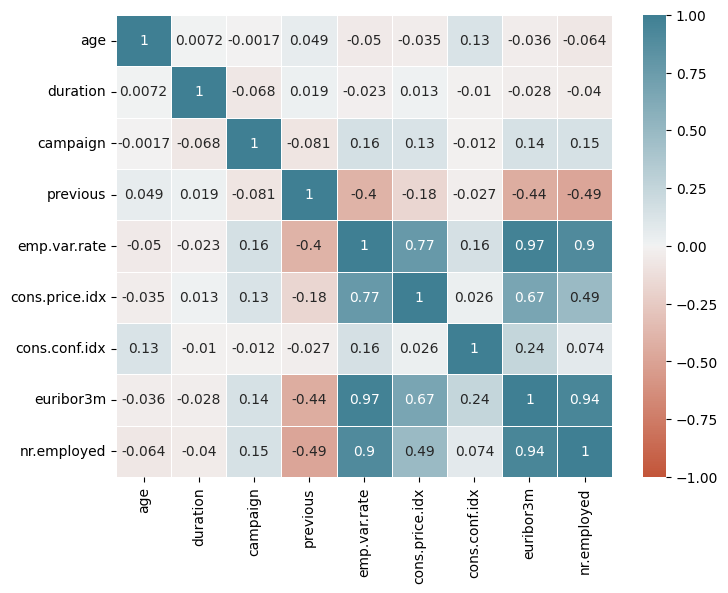

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(dataset_copy[numerical_columns.columns.to_list()].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

<p>It shows euribor3m and nr.employed showed high correlation with various other variables. So, dropping these columns.</p>

In [30]:
dataset_copy.drop("cons.price.idx", axis=1, inplace=True)
# dataset_copy.drop("emp.var.rate", axis=1, inplace=True)
dataset_copy.drop("euribor3m", axis=1, inplace=True)
dataset_copy.drop("nr.employed", axis=1, inplace=True)

In [31]:
numerical_columns = dataset_copy.select_dtypes(include=np.number)
numerical_columns

,age,duration,campaign,previous,emp.var.rate,cons.conf.idx
0,56,261,1,0,1.1,-36.4
2,37,226,1,0,1.1,-36.4
3,40,151,1,0,1.1,-36.4
4,56,307,1,0,1.1,-36.4
6,59,139,1,0,1.1,-36.4
...,...,...,...,...,...,...
41183,73,334,1,0,-1.1,-50.8
41184,46,383,1,0,-1.1,-50.8
41185,56,189,2,0,-1.1,-50.8
41186,44,442,1,0,-1.1,-50.8


In [32]:
display(numerical_columns.corr())

,age,duration,campaign,previous,emp.var.rate,cons.conf.idx
age,1.000000,0.007246,-0.001714,0.048681,-0.049864,0.125040
duration,0.007246,1.000000,-0.068146,0.018941,-0.022834,-0.009972
campaign,-0.001714,-0.068146,1.000000,-0.080916,0.157984,-0.012209
previous,0.048681,0.018941,-0.080916,1.000000,-0.403942,-0.027428
emp.var.rate,-0.049864,-0.022834,0.157984,-0.403942,1.000000,0.156177
cons.conf.idx,0.125040,-0.009972,-0.012209,-0.027428,0.156177,1.000000


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

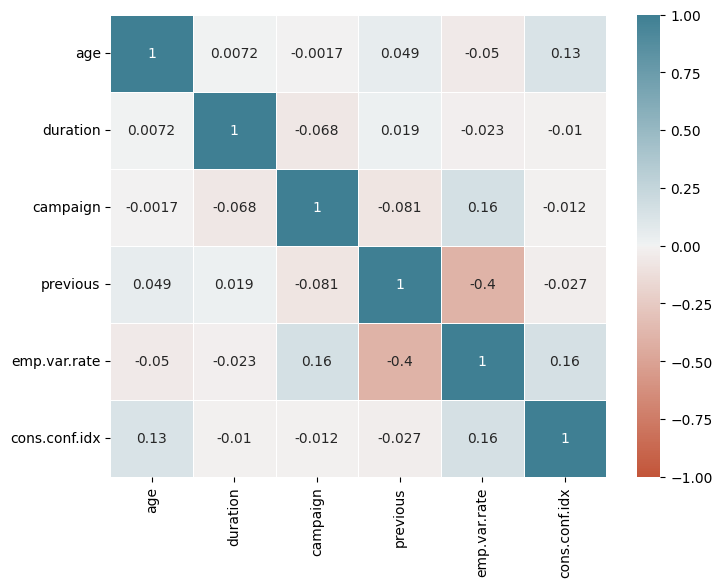

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(dataset_copy[numerical_columns.columns.to_list()].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

## Multicolinearity Test

In [35]:
def vif_factor(columns):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["features"] = columns.columns
    vif["vif_factor"] = [variance_inflation_factor(columns.values, i) for i in range(columns.shape[1])]

    return vif.sort_values("vif_factor")

In [36]:
display(vif_factor(dataset.select_dtypes(include=np.number)))

,features,vif_factor
3,previous,1.500724
2,campaign,1.926027
1,duration,1.996791
0,age,15.600049
4,emp.var.rate,27.419100
6,cons.conf.idx,108.577337
7,euribor3m,194.720538
5,cons.price.idx,20765.908747
8,nr.employed,24487.628525


In [37]:
display(vif_factor(numerical_columns))

,features,vif_factor
4,emp.var.rate,1.223376
3,previous,1.359038
2,campaign,1.911032
1,duration,1.974708
0,age,11.804606
5,cons.conf.idx,13.049908


<h3>Correlation between Categorical Features</h3>
<i>(Also called association)</i>
<p>
    It is based on a Pearson's Chi-Square Test, its result ranges from 0 t0 1 where 0 represents no association and 1 represent association.
</p>

In [38]:
import scipy as ss
from scipy.stats import chi2_contingency

#### Cramer's V method to measure the association

In [58]:
# Function to measure the association
def crammers_v(feature1: pd.DataFrame, feature2:pd.DataFrame) -> int:
    # cross table building
    crosstab = np.array(pd.crosstab(feature1, feature2, rownames=None, colnames=None))
    # Keeping the test statistics of the Chi2 test
    stat = chi2_contingency(crosstab)[0]
    n_obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1

    return (stat/(n_obs*mini))

In [59]:
categorical_columns = dataset_copy.select_dtypes(include=object)
categorical_columns

,job,marital,education,default,housing,loan,contact,month,day_of_week,previously_contacted,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,no,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,no,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,no,nonexistent,no
6,admin.,married,professional.course,no,no,no,telephone,may,mon,no,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,no,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,no,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,no,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,no,nonexistent,yes


In [61]:
# Creating a dataframe explaining association amongst all the categorical features
def create_association_matrix(categorical_cols: pd.DataFrame) -> pd.DataFrame:
    rows = []

    for feature1 in categorical_cols:
        col = []
        for feature2 in categorical_cols:
            # Cramer's V test
            cramers_value = crammers_v(categorical_cols[feature1], categorical_cols[feature2])
            col.append(round(cramers_value, 2))
        rows.append(col)

    cramers_results = np.array(rows)
    return pd.DataFrame(cramers_results, columns=categorical_cols.columns, index=categorical_cols.columns)
    

In [76]:
association_result = create_association_matrix(categorical_columns.drop("y", axis=1))
display(association_result)

,job,marital,education,default,housing,loan,contact,month,day_of_week,previously_contacted,poutcome
job,1.00,0.04,0.15,0.00,0.00,0.0,0.01,0.01,0.0,0.02,0.01
marital,0.04,1.00,0.02,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
education,0.15,0.02,1.00,0.00,0.00,0.0,0.01,0.01,0.0,0.00,0.00
default,0.00,0.00,0.00,0.69,0.00,0.0,0.00,0.00,0.0,0.00,0.00
housing,0.00,0.00,0.00,0.00,1.00,0.0,0.01,0.01,0.0,0.00,0.00
loan,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.0,0.00,0.00
contact,0.01,0.00,0.01,0.00,0.01,0.0,1.00,0.32,0.0,0.01,0.05
month,0.01,0.00,0.01,0.00,0.01,0.0,0.32,1.00,0.0,0.05,0.05
day_of_week,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.0,0.00,0.00
previously_contacted,0.02,0.00,0.00,0.00,0.00,0.0,0.01,0.05,0.0,1.00,0.91


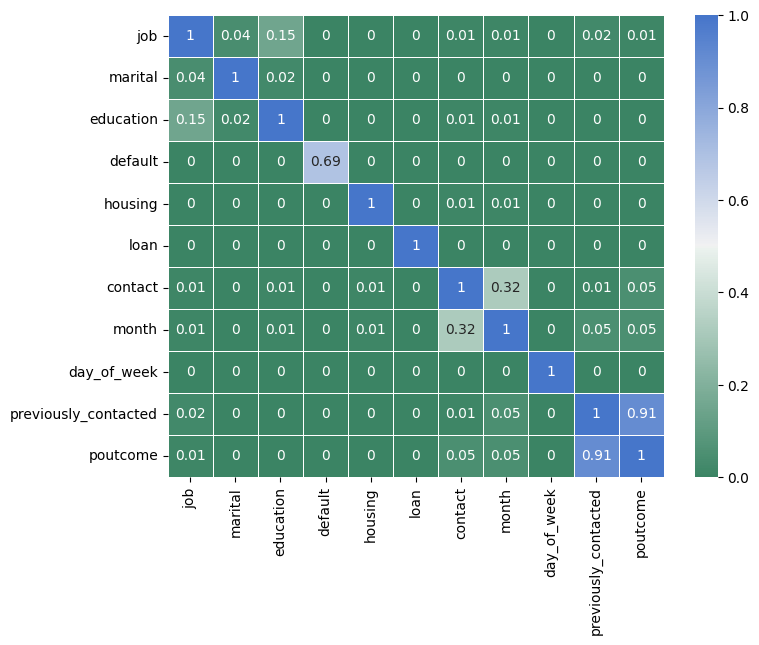

In [85]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(association_result, vmin=0, vmax=1, cmap=sns.diverging_palette(150, 255, as_cmap=True), annot=True, linewidths=.5)
plt.show()

In [86]:
association_result = create_association_matrix(categorical_columns.drop("y", axis=1).drop("poutcome", axis=1))
display(association_result)

,job,marital,education,default,housing,loan,contact,month,day_of_week,previously_contacted
job,1.00,0.04,0.15,0.00,0.00,0.0,0.01,0.01,0.0,0.02
marital,0.04,1.00,0.02,0.00,0.00,0.0,0.00,0.00,0.0,0.00
education,0.15,0.02,1.00,0.00,0.00,0.0,0.01,0.01,0.0,0.00
default,0.00,0.00,0.00,0.69,0.00,0.0,0.00,0.00,0.0,0.00
housing,0.00,0.00,0.00,0.00,1.00,0.0,0.01,0.01,0.0,0.00
loan,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.0,0.00
contact,0.01,0.00,0.01,0.00,0.01,0.0,1.00,0.32,0.0,0.01
month,0.01,0.00,0.01,0.00,0.01,0.0,0.32,1.00,0.0,0.05
day_of_week,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.0,0.00
previously_contacted,0.02,0.00,0.00,0.00,0.00,0.0,0.01,0.05,0.0,1.00


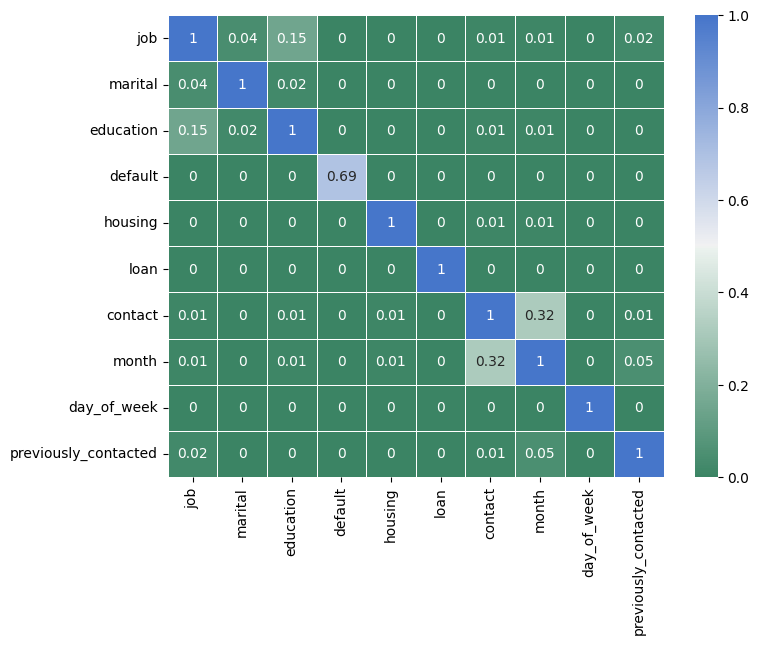

In [87]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(association_result, vmin=0, vmax=1, cmap=sns.diverging_palette(150, 255, as_cmap=True), annot=True, linewidths=.5)
plt.show()